#Imports

In [4]:
# Imports
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [3]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2

#librosa library for audio file processing
import librosa

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

# Data Upload

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_cat = '/content/drive/MyDrive/Datasets/Cat_dog_train/cat'
path_dog = '/content/drive/MyDrive/Datasets/Cat_dog_train/dog'

In [7]:
cat_data = list(glob.glob(path_cat+'/*.wav'))
dog_data = list(glob.glob(path_dog+'/*.wav'))

In [11]:
y, sr = librosa.load(dog_data[0], sr=44100)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
S_DB = librosa.power_to_db(S, ref=np.max)

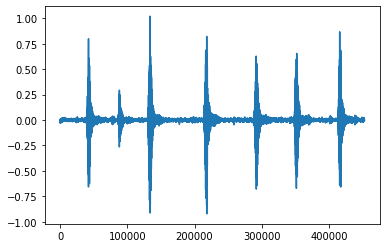

In [15]:
# data plot
plt.plot(y)

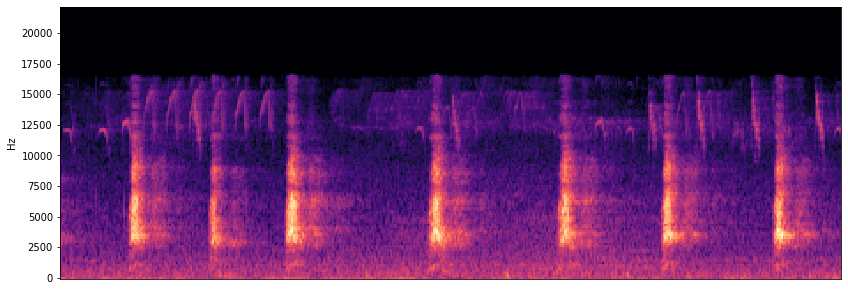

In [16]:
#spectogram_plot
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_DB, sr=sr, y_axis='hz')

# Convert Audio to Spectrograam

In [9]:
# Load audio data and convert to spectrograms
def convert_audio_to_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=44100)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    S_DB = librosa.power_to_db(S, ref=np.max)
    return S_DB

In [10]:
convert_audio_to_spectrogram(cat_data[0])

array([[-59.11632 , -56.79451 , -55.267567, ..., -56.423576, -55.147743,
        -56.29214 ],
       [-64.773605, -64.702515, -58.272507, ..., -59.254883, -65.45    ,
        -61.50254 ],
       [-65.49734 , -58.34604 , -57.46869 , ..., -49.594254, -55.832237,
        -58.43889 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

# Save spectrograms as images in a folder

In [17]:
# Save spectrograms as images in a folder (in drive)
def save_spectrogram_as_image(audio_dir, image_dir):
    for file in os.listdir(audio_dir):
        if file.endswith('.wav'):
            audio_path = os.path.join(audio_dir, file)
            img_path = os.path.join(image_dir, file.split('.')[0] + '.png')
            S_DB = convert_audio_to_spectrogram(audio_path)
            plt.imsave(img_path, S_DB, cmap='gray')


In [11]:
img_path = '/content/drive/MyDrive/Datasets/Cat_dog_train/images'
# img_path2 = '/content/drive/MyDrive/Datasets/Cat_dog_train/images_dog'

In [20]:
save_spectrogram_as_image(path_cat,img_path)

In [42]:
save_spectrogram_as_image(path_dog,img_path)

In [43]:
cat_spec= list(glob.glob(img_path+'/*.png'))
# dog_spec= list(glob.glob(img_path2+'/*.png'))

# Resize the images to a fixed size 

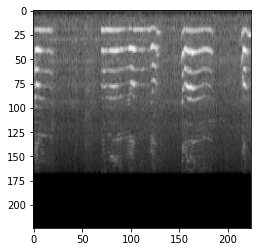

In [32]:
img = cv2.imread(cat_spec[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(img, (224,224), interpolation=cv2.INTER_AREA)
plt.imshow(resized_img)
# cv2.imwrite(image_path, resized_img)

In [33]:
# Resize images to a fixed size
def resize_image(image_path, new_size):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)
    cv2.imwrite(image_path, resized_img)

In [44]:
new_size=(224,224)
for file in cat_spec:
  resize_image(file,new_size)

# for file in dog_spec:
#   resize_image(file,new_size)

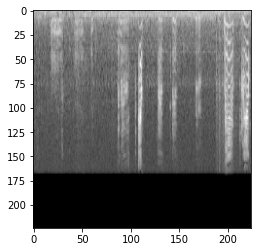

In [39]:
img1 = cv2.imread(cat_spec[2])
plt.imshow(img1)

# Prepare the dataset using Images and Labels

In [8]:
# Load resized images and corresponding labels into memory
def load_dataset(image_dir):
    X = []
    y = []
    for file in os.listdir(image_dir):
        if file.endswith('.png'):
            img_path = os.path.join(image_dir, file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            if 'cat' in file:
                y.append(0)
            else:
                y.append(1)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [12]:
X,Y = load_dataset(img_path)

In [13]:
X.shape

(210, 224, 224, 3)

In [15]:
Y.shape

(210,)

In [16]:
df = pd.DataFrame(list(zip(X,Y)),columns=['img','label'])

In [17]:
df.head()

,img,label
0,"[[[69, 69, 69], [75, 75, 75], [64, 64, 64], [6...",0
1,"[[[90, 90, 90], [73, 73, 73], [73, 73, 73], [8...",0
2,"[[[184, 184, 184], [184, 184, 184], [187, 187,...",0
3,"[[[53, 53, 53], [51, 51, 51], [53, 53, 53], [5...",0
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0


In [18]:
df.shape

(210, 2)

In [19]:
df['img'][0]

array([[[69, 69, 69],
        [75, 75, 75],
        [64, 64, 64],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [79, 79, 79]],

       [[64, 64, 64],
        [71, 71, 71],
        [60, 60, 60],
        ...,
        [69, 69, 69],
        [64, 64, 64],
        [71, 71, 71]],

       [[48, 48, 48],
        [61, 61, 61],
        [49, 49, 49],
        ...,
        [61, 61, 61],
        [41, 41, 41],
        [48, 48, 48]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

# Train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 2D CNN Architecture for Image classification 

In [21]:
# define cnn model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32,3, activation='relu')),
model.add(Dropout(0.2)),
model.add(Conv2D(128,3, activation='relu')),
model.add(Dropout(0.2)),    
model.add(MaxPooling2D()),
model.add(Dropout(0.2)),
model.add(MaxPooling2D((2, 2))),
model.add(Flatten()),
model.add(Dense(16, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 dropout (Dropout)           (None, 220, 220, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 128)     36992     
                                                                 
 dropout_1 (Dropout)         (None, 218, 218, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 128)    0         
 )                                                               
                                                        

In [23]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [24]:
history = model.fit(X_train, y_train, 
                    epochs=3, batch_size=32, 
                    validation_data=(X_val, y_val)
                    )

Epoch 1/3
5/5 [==============================] - 110s 20s/step - loss: 1730.9979 - accuracy: 0.5896 - val_loss: 30.2874 - val_accuracy: 0.7353
Epoch 2/3
5/5 [==============================] - 96s 18s/step - loss: 99.5903 - accuracy: 0.5896 - val_loss: 1.4142 - val_accuracy: 0.5588
Epoch 3/3
5/5 [==============================] - 94s 18s/step - loss: 15.9165 - accuracy: 0.4552 - val_loss: 0.6937 - val_accuracy: 0.2647


In [25]:
from sklearn.metrics import classification_report
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
# print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

# Print classification report
y_true = y_test
y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels))

2/2 [==============================] - 5s 2s/step - loss: 0.6931 - accuracy: 0.5000
Test loss: 0.6931480169296265
Test accuracy: 0.5
2/2 [==============================] - 7s 2s/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        21
           1       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# VGG16 Model for Classification

In [49]:
from tensorflow.keras.applications import VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_3 = Sequential()
model_3 = Sequential()
# Add the pre-trained VGG16 model to the new model
model_3.add(vgg)

# Add new fully-connected layers for binary classification
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation='sigmoid'))


In [50]:
# Freeze the weights of the pre-trained layers
for layer in vgg.layers:
    layer.trainable = False

In [51]:
# Fine-tune the pre-trained layers and the new layers together
for layer in model.layers[:15]:
    layer.trainable = False
for layer in model.layers[15:]:
    layer.trainable = True

In [52]:
# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train only the weights of the new layers for the binary classification task
history = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
5/5 [==============================] - 3s 239ms/step - loss: 7.8406 - accuracy: 0.6940 - val_loss: 7.6386 - val_accuracy: 0.7941
Epoch 2/10
5/5 [==============================] - 1s 151ms/step - loss: 4.3707 - accuracy: 0.9030 - val_loss: 0.3929 - val_accuracy: 0.9706
Epoch 3/10
5/5 [==============================] - 1s 149ms/step - loss: 1.8123 - accuracy: 0.9552 - val_loss: 5.3446e-05 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 1s 147ms/step - loss: 0.6429 - accuracy: 0.9627 - val_loss: 1.2700 - val_accuracy: 0.9412
Epoch 5/10
5/5 [==============================] - 1s 149ms/step - loss: 0.5431 - accuracy: 0.9776 - val_loss: 1.5130 - val_accuracy: 0.9412
Epoch 6/10
5/5 [==============================] - 1s 150ms/step - loss: 0.0950 - accuracy: 0.9925 - val_loss: 1.8232 - val_accuracy: 0.9412
Epoch 7/10
5/5 [==============================] - 1s 148ms/step - loss: 0.2990 - accuracy: 0.9776 - val_loss: 0.8724 - val_accuracy: 0.9706
Epoch 8/10
5/5 [

In [53]:
from sklearn.metrics import classification_report
test_loss, test_accuracy = model_3.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
# print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

# Print classification report
y_true = y_test
y_pred = model_3.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels))

2/2 [==============================] - 0s 83ms/step - loss: 1.4537 - accuracy: 0.9048
Test loss: 1.4536659717559814
Test accuracy: 0.9047619104385376
2/2 [==============================] - 0s 117ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        21
           1       0.00      0.00      0.00        21

    accuracy                           0.50        42
   macro avg       0.25      0.50      0.33        42
weighted avg       0.25      0.50      0.33        42



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
